## Data Analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [21]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?", stringsAsFactors = TRUE)
colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "hal", "num")
mutate(hungarian_heart_disease_data, num = as_factor(num))

# tidy_hungarian_heart_disease_data <- hungarian_heart_disease_data |>
#     mutate(patient_id = row_number())


# heart_disease_data_scaled <- tidy_hungarian_heart_disease_data |> 
#     select(age:thal) |>
#     mutate_all(scale, center = TRUE) |>
#     bind_cols(tidy_hungarian_heart_disease_data |> select(patient_id, num))

    
heart_disease_relevant <- hungarian_heart_disease_data|>
    select(-slope, -ca, -hal)

heart_disease_relevant$num <- as_factor(heart_disease_relevant$num)

heart_disease_relevant


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
29,1,2,140,NA,0,0,170,0,0,0
30,0,1,170,237,0,1,170,0,0,0
31,0,2,100,219,0,1,150,0,0,0
32,0,2,105,198,0,0,165,0,0,0
32,1,2,110,225,0,0,184,0,0,0
32,1,2,125,254,0,0,155,0,0,0
33,1,3,120,298,0,0,185,0,0,0


### **We removed columns slope (slope of the peak exercise ST segment), ca (number of major vessels), hal (histidine ammonia-lyase (HAL) gene) due to the fact that majority of the data is NA, which will be very supportive in developing our prediciton model.**

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


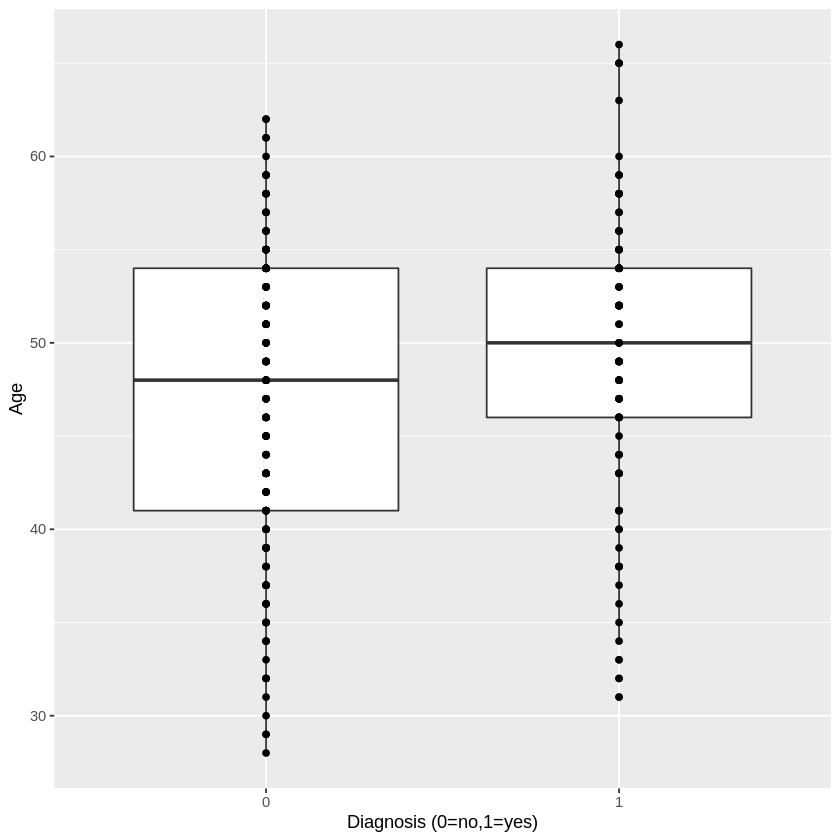

Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23 rows containing missing values (geom_point).”


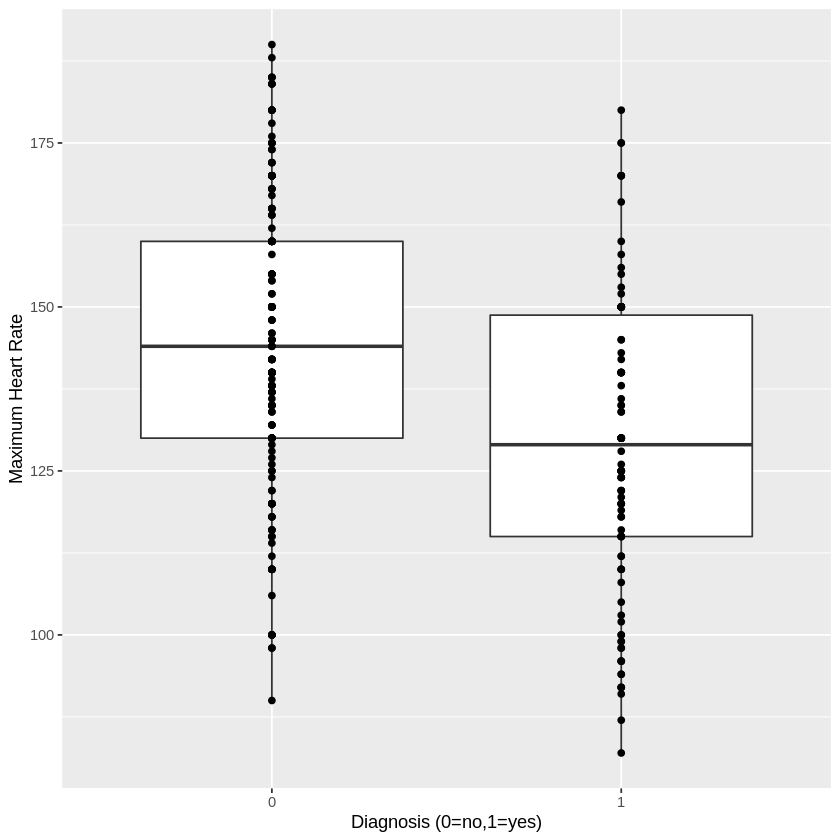

Warning message:
“Removed 782 rows containing non-finite values (stat_density).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


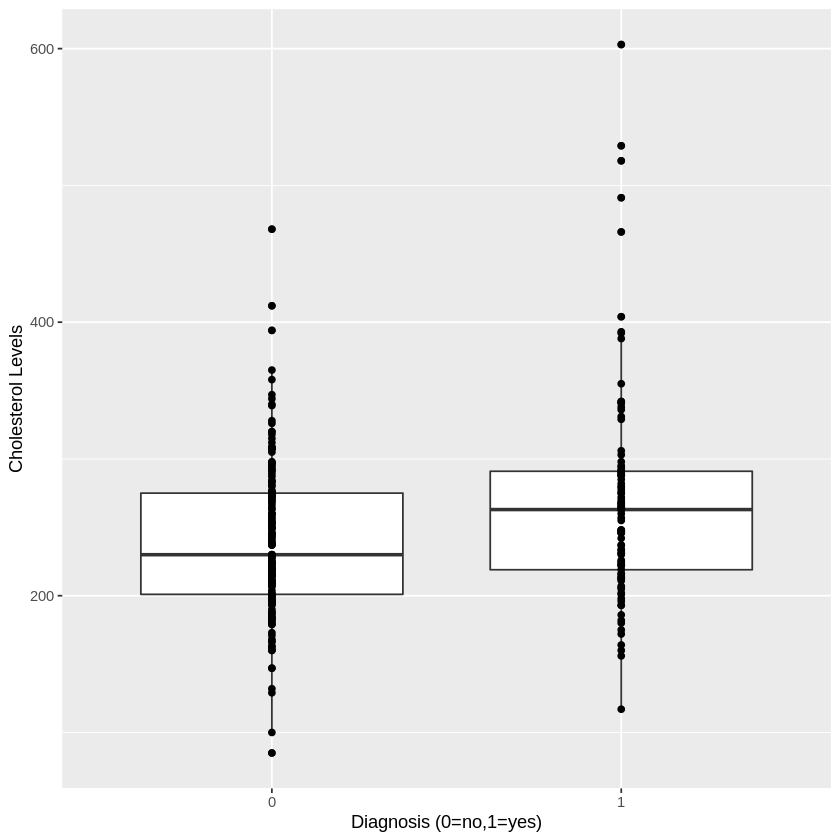

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


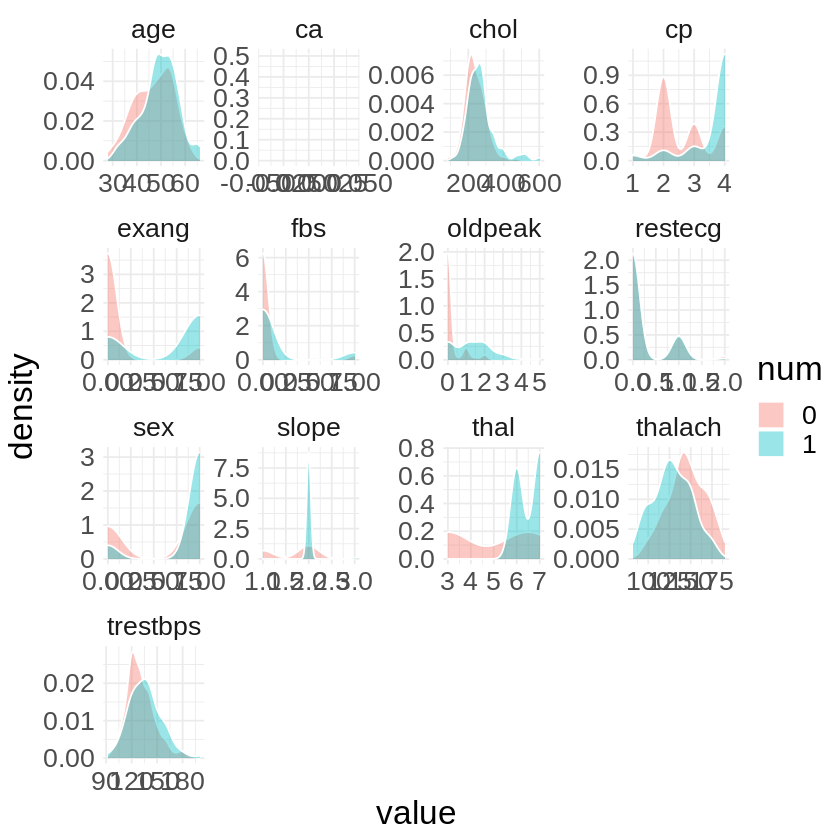

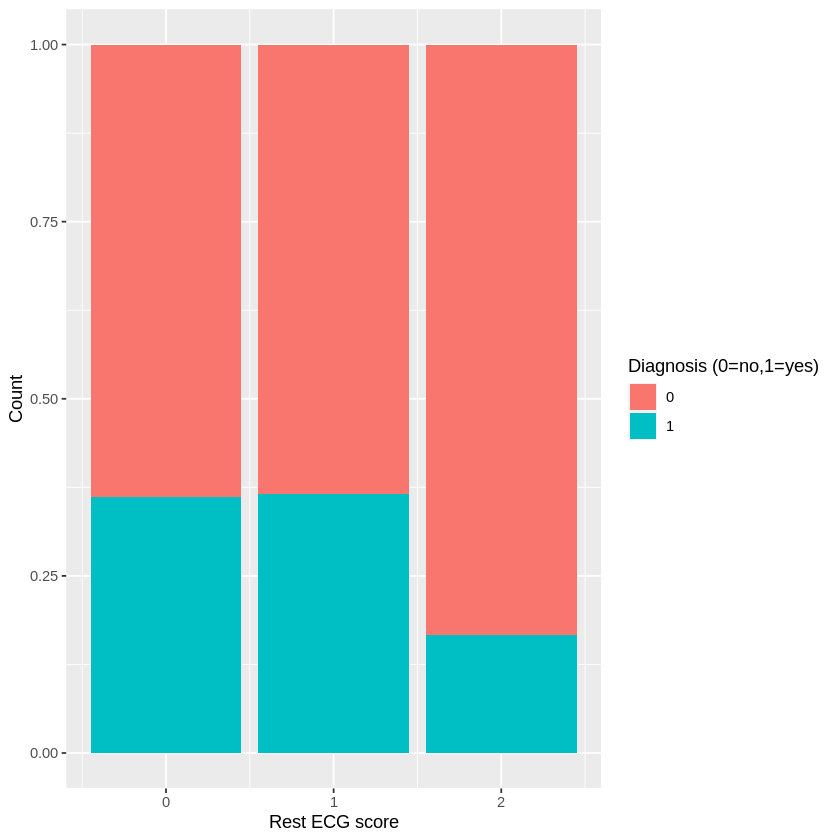

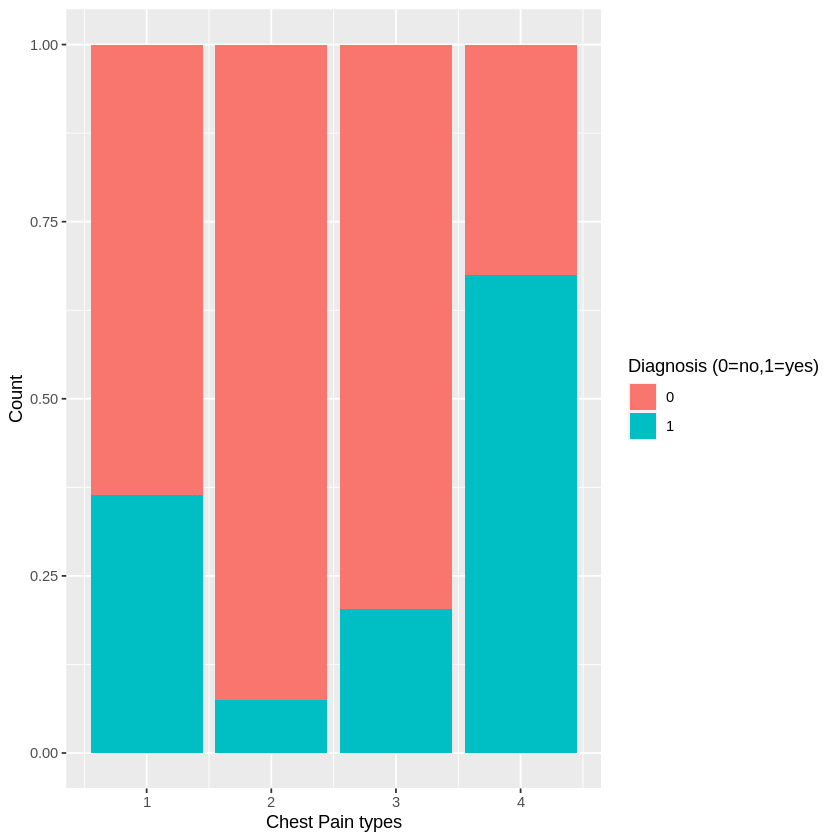

In [11]:
# #NUMERICAL predictor
#         ### Difference between diagnosed and not diagnosed: 
#                     #thalach (maximum heart rate) > chol (cholesterol) > age

# ggplot(hungarian_heart_disease_data, aes(x = num,y=age)) +   
#   geom_boxplot() +
#     geom_point()+
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Age')
#     #not much difference in distribution between those diagnosed and those not diagnosed

# ggplot(hungarian_heart_disease_data, aes(x = num,y=thalach)) +   
#   geom_boxplot() +
#     geom_point() +
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Maximum Heart Rate')
#     #more apparent difference in distribution between those diagnosed and those not diagnosed

# ggplot(hungarian_heart_disease_data, aes(x = num,y=chol)) +   
#   geom_boxplot() +
#     geom_point() +
#     labs(x='Diagnosis (0=no,1=yes)',y= 'Cholesterol Levels')
#     #some difference in distribution between those diagnosed and those not diagnosed



# #CATEGORICAL predictor
#          ### Difference between diagnosed and not diagnosed: 
#                     # cp (chest pain) > restecg (resting ECG)

# ggplot(hungarian_heart_disease_data,aes(x=restecg, fill= num)) +
#    geom_bar(position='fill') +
#     labs(x='Rest ECG score', y= 'Count', fill='Diagnosis (0=no,1=yes)')
#         #Score 1 and 2 have similar count in diagnosed vs non-diagnosed, score 3 100% non-diagnosed
    


# ggplot(hungarian_heart_disease_data,aes(x=cp, fill= num)) +
#    geom_bar(position='fill') +
#     labs(x='Chest Pain types',y= 'Count', fill='Diagnosis (0=no,1=yes)')
#         #All 4 types of chest pain have different count in diagnosed vs non-diagnosed



Warning message:
“Removed 35 rows containing non-finite values (stat_density).”


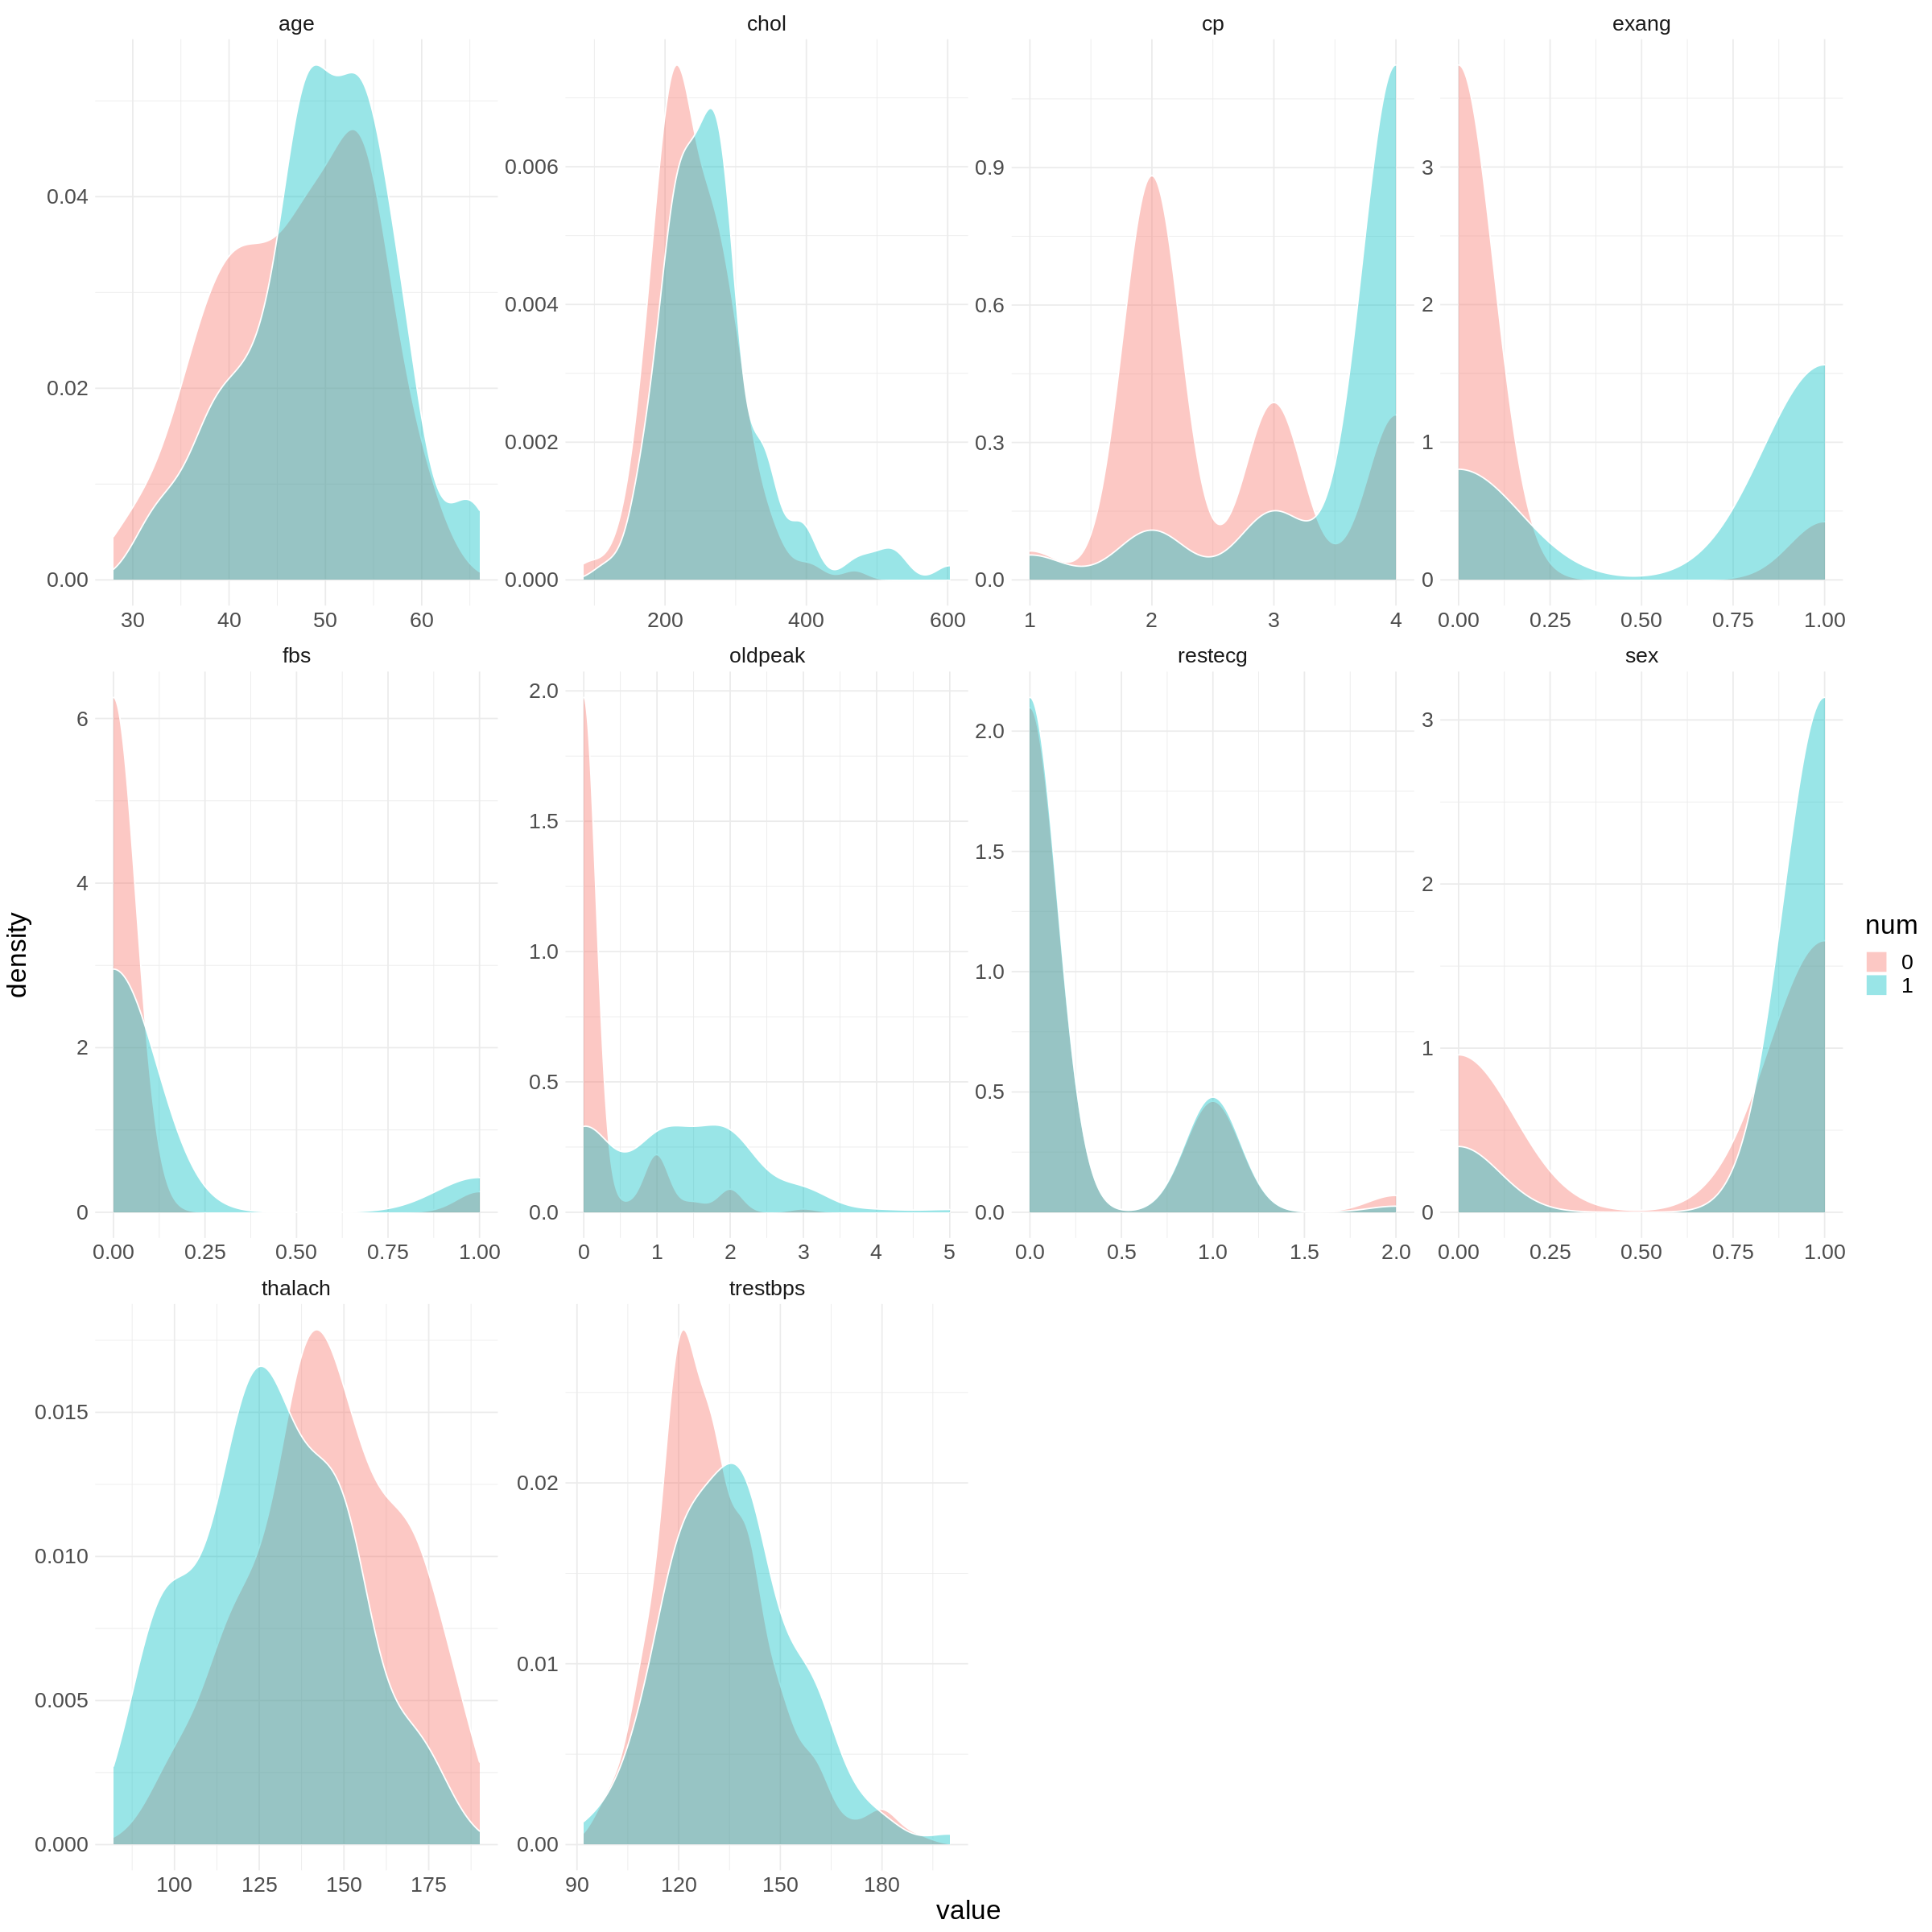

In [19]:
options(repr.plot.width = 20, repr.plot.height = 20)

heart_disease_relevant |>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20)) 





## ****** ^ TODO: RENAME TITLES OF GRAPHS


### **Judging from the distribution of the variables in relation to diagnosis or non-diagnosis of heart disease, we would pick numerical variables, age and thalach (maximum heart rate achieved), and a categorical variable, cp (chest pain types). We chose these because they differ the most in distribution between diagnosis and non-diagnosis of heart disease.**

In [4]:
set.seed(1234)

heart_disease_split <- initial_split(heart_disease_relevant, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

